# Data Wrangling with Python: Activity 9, page 294

### Import libraries

In [36]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [37]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [38]:
# URL and get Response
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

### Check Status of the Request

In [39]:
def verify_status(response):
    if response.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [40]:
status_check(response)

Success!


1

### Decode the response and pass on to `BeautifulSoup` for HTML parsing

In [41]:
contents = response.content.decode(response.encoding)

In [42]:
soup = BeautifulSoup(contents, 'html.parser')

### Find all the _href_ tags and store them in the list of links. Check how the list looks like - print first 30 elements

In [43]:
# Empty list to hold all the http links in the HTML page
lst_links=[]

In [44]:
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))

In [45]:
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

### Use regular expression to find the numeric digits in these links. <br>These are the file number for the Top 100 books.

#### Initialize empty list to hold the file numbers

In [46]:
booknumber=[]

* Number 19 to 118 in the original list of links have the Top 100 ebooks' number. 
* Loop over appropriate range and use regex to find the numeric digits in the link (href) string.
* Hint: Use `findall()` method

In [47]:
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknumber.append(int(n[0]))

#### Print the file numbers

In [48]:
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 84, 1342, 1080, 11, 64317, 25344, 5200, 76, 844, 98, 46, 43, 2542, 2701, 1260, 1661, 1250, 2852, 174, 219, 160, 74, 1952, 1400, 408, 64634, 120, 23, 19942, 1232, 345, 16, 64631, 205, 55, 1497, 64630, 16328, 215, 730, 64632, 514, 57775, 2591, 158, 37134, 64629, 4300, 42324, 45, 3207, 2554, 2600, 64626, 2814, 244, 1184, 5740, 64628, 135, 768, 64635, 42108, 3825, 36, 64636, 10741, 1727, 64624, 58585, 203, 20203, 6130, 6133, 2097, 64625, 113, 236, 1001, 64627, 140, 2500, 1934, 829, 64623, 15399]


### How does the `soup` object's text look like? Use `.text()` method and print only first 2000 characters (i.e. do not print the whole thing, it is long).

You will notice lot of empty spaces/blanks here and there. Ignore them. They are part of HTML page markup and its whimsical nature!

In [49]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-02-26195869
last 7 days1441494
last 30 days5886888



Top 100 EBooks yesterd

### Search in the extracted text (using regular expression) from the `soup` object to find the names of top 100 Ebooks (Yesterday's rank)

In [50]:
lst_titles_temp=[]

#### Create a starting index. It should point at the text _"Top 100 Ebooks yesterday"_. Hint: Use `splitlines()` method of the `soup.text`. It splits the lines of the text of the `soup` object.

In [51]:
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

#### Loop 1-100 to add the strings of next 100 lines to this temporary list. Hint: `splitlines()` method

In [52]:
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

#### Use regular expression to extract only text from the name strings and append to an empty list
* Hint: Use `match` and `span` to find indices and use them

In [53]:
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

#### Print the list of titles

In [54]:
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Frankenstein
Pride and Prejudice by Jane Austen 
A Modest Proposal by Jonathan Swift 
Alice
The Great Gatsby by F
The Scarlet Letter by Nathaniel Hawthorne 
Metamorphosis by Franz Kafka 
Adventures of Huckleberry Finn by Mark Twain 
The Importance of Being Earnest
A Tale of Two Cities by Charles Dickens 
A Christmas Carol in Prose
The Strange Case of Dr
Et dukkehjem
Moby Dick
Jane Eyre
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Anthem by Ayn Rand 
The Hound of the Baskervilles by Arthur Conan Doyle 
The Picture of Dorian Gray by Oscar Wilde 
Heart of Darkness by Joseph Conrad 
The Awakening
The Adventures of Tom Sawyer
The Yellow Wallpaper by Charlotte Perkins Gilman 
Great Expectations by Charles Dickens 
The Souls of Black Folk by W
Labyrinth by Helen R
Treasure Island by Robert Louis Stevenson 
Narrative of the Life of Frederick Douglass
Candide by Voltaire 
Il Principe
Dracula by Bram Stoker 
Peter Pan by J
Let the Ants Try by Frederik Pohl

#  Data Wrangling with Python: Activity 10, page 295

In [58]:
import urllib.request, urllib.parse, urllib.error
import json

In [59]:
with open('APIkey_Bogus_example.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [60]:
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&18cdc959='+omdbapi

In [61]:
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [62]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [63]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [64]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&18cdc959=18cdc959
ERROR: Unauthorized


## Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code.

In [96]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
from pandas.tseries.offsets import Hour, Minute

In [97]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [98]:
iris_df = pd.read_csv('irisdata.csv')

In [100]:
iris_df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

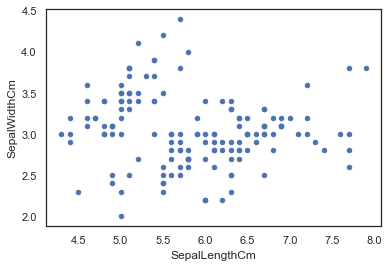

In [101]:
iris_df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

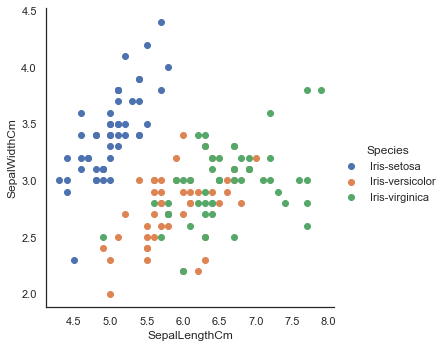

In [104]:
sns.FacetGrid(iris_df, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

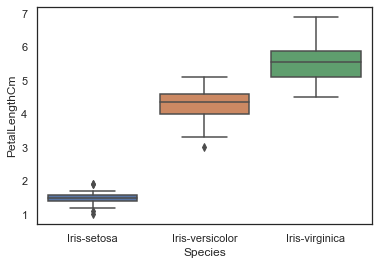

In [105]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris_df)

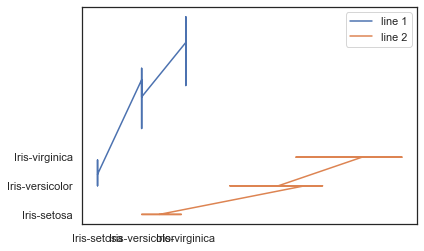

In [108]:
# Line Chart
x = iris_df["Species"] 
y = iris_df["PetalLengthCm"]
  
plt.plot(x, y, label = "line 1") 
plt.plot(y, x, label = "line 2") 
plt.legend() 
plt.show()

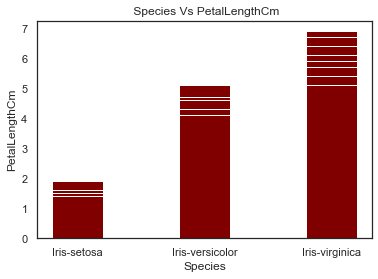

In [111]:
plt.bar(x, y, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Species") 
plt.ylabel("PetalLengthCm") 
plt.title(" Species Vs PetalLengthCm") 
plt.show() 

In [116]:
import tweepy

# Authenticate to Twitter
auth = tweepy.OAuthHandler("pGBDoAaEpkliVKBOLwjtcmHGc", 
    "xF3g1wrP50b6BlZEd20u4oVfjgH1FGQcuWUzlQO5aUWOufvlhw")
auth.set_access_token("622518493-6VcLIPprbQbv9wkcBBPvCle8vsjU9fE85Dq9oStl", 
    "tH9aKQbQQ1iRdYTcLSsPwitl44BkAc6jilrsU0ifnXvZhq")

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [117]:
api = tweepy.API(auth, wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True)

In [ ]:
for tweet in api.search(q="Data Science", lang="en", rpp=10):
    print(f"{tweet.user.name}:{tweet.text}")